In [52]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
from Bio.Seq import Seq
from Bio import Seq

In [24]:
##Part 1
#def defines a function called get_sequences_from_file, it's input will be a fasta
def get_sequences_from_file(fasta_fn):
#creating a dictionary 
    sequence_data_dict = {}
#for loop that goes through each fasta entry 
    for record in SeqIO.parse(fasta_fn, "fasta"):
#pulls out description
        description = record.description.split()
#pulls out species name
        species_name = description[1] + " " + description[2]
#using dictionary, key is species name, values are sequence records
        sequence_data_dict[species_name] = record.seq
#returns dictionary 
    return(sequence_data_dict)

In [25]:
#Get the sequences from bears file
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 

In [26]:
#Check sequence file
cytb_seqs

{'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA', SingleLetterAlphabet()),
 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA', SingleLetterAlphabet()),
 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...AGA', SingleLetterAlphabet()),
 'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA', SingleLetterAlphabet()),
 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...A

In [27]:
##Part 2
#Define a function that will take a string of nucleotides as input and return amino acid sequence
def translate_function(string_nucleotides): 
#Using condon table from biopython to collect verterbrate mitochnodrial code = mito_table 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = ""
#For every third letter in the nucleotide string
    for n in range(0,len(string_nucleotides)-3, 3):
        codon = string_nucleotides[n:n+3]
#Return codon from mito_table and create new string called aa_seq_string
        aa_seq_string += (mito_table.forward_table[codon])
#Return aa_seq_string which should have amino acids now instead of codons
    return(aa_seq_string)

In [28]:
#Test function on random nucleotide sequence
translate_function("AATGGCCCGGGAAAG")

'NGPG'

In [53]:
##Part 3
#Biopython function that is much easier than function I wrote
def translate_function_biopython(string_nucleotides):
#Define table from biopython package, as done above
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
#Return translated string from string of nucleotides, with specified table, leave out stop codon
    return Seq.translate(string_nucleotides, table=mito_table, to_stop=True)

In [54]:
#Test this function
translate_function_biopython("AATGGCCCGGGAAAG")

'NGPGK'

In [40]:
##Part 4
#find proportion of amino acids that have the following attributes
def get_proportion_aa_type_function(aa_seq):
#designates charged amino acids
    charged = ['R','K','D','E']
#designates polar amino acids
    polar = ['Q','N','H','S','T','Y','C','M','W']
#designates hypdrophobic amino acids
    hydrophobic = ['A','I','L','F','V','P','G']
#Create empty values for counts, this will get filled in when run on real samples
    charged_count=0
    polar_count=0
    hydro_count=0
#total count for amino acid string. float allows intergers to be counted from stings with the += function
    acid_count = float(len(aa_seq))
#For loop to pull out charged, polar, hydrophobic proportions
    for aa in aa_seq:
#if amino acid is charged add 1 to the created charged value 
        if aa in charged:
            charged_count += 1
#else if amino acid is polar add 1 to the created polar value
        elif aa in polar:
            polar_count += 1
#else if amino acid is hydrophobic add 1 to the created hydrophobic value
        elif aa in hydrophobic:
            hydro_count += 1

#return the count of the category over the full length of amino acid string as decimal
    return charged_count / acid_count, polar_count / acid_count, hydro_count / acid_count



In [55]:
#Test proportion function on test string from above
get_proportion_aa_type_function("NGPGK")

(0.2, 0.2, 0.6)

In [57]:
##Part 5 
#load bears_data.csv in as bear_df to add columns
bear_df = pd.read_csv("bears_data.csv")

In [59]:
#I think index repeats the columns created across the varioius rows. Might also be called chained indexing?
#source for index: http://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe
index = 0
#For each key (species name) perform the following functions on the sequence
for i in cytb_seqs.keys():
#translate nucleotides into aminio acids, call it aa_seq
    aa_seq = translate_function(str(cytb_seqs[i]))
#find proportions of charged, polar, hydrophobic 
    charged_prop, polar_prop, hydro_prop = get_proportion_aa_type_function(aa_seq)
#add these items to bears_df as "charged", "polar", and "hydrophobic"
    bear_df.set_value(index, 'charged', charged_prop)
    bear_df.set_value(index, 'polar', polar_prop)
    bear_df.set_value(index, 'hydrophobic', hydro_prop)
    
    index += 1

In [61]:
print(bear_df)

                  species     mass   charged     polar  hydrophobic
0          Ursus spelaeus  550.800  0.092348  0.329815     0.577836
1            Ursus arctos  203.500  0.092348  0.324538     0.583113
2        Ursus thibetanus   99.714  0.092348  0.327177     0.580475
3        Melursus ursinus  100.030  0.089710  0.340369     0.569921
4        Ursus americanus  110.560  0.089710  0.337731     0.572559
5     Helarctos malayanus   47.020  0.092348  0.340369     0.567282
6  Ailuropoda melanoleuca  118.200  0.089710  0.343008     0.567282
7      Tremarctos ornatus  140.700  0.089710  0.335092     0.575198
8         Ursus maritimus  425.100  0.092348  0.327177     0.580475


In [70]:
#importing necessary packages to plot images
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [73]:
#allows graphs to be printed in notebook
%matplotlib inline

In [74]:
#removing species and mass to be graphed
bear_bar = bear_df[['species', 'mass']]
bear_bar

,species,mass
0,Ursus spelaeus,550.800
1,Ursus arctos,203.500
2,Ursus thibetanus,99.714
3,Melursus ursinus,100.030
4,Ursus americanus,110.560
5,Helarctos malayanus,47.020
6,Ailuropoda melanoleuca,118.200
7,Tremarctos ornatus,140.700
8,Ursus maritimus,425.100


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

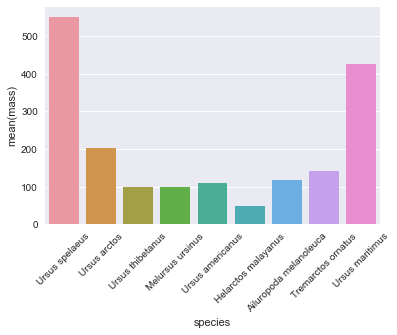

In [75]:
##Part 6
#plot bear species by mass using seaborn and matplotlib.pyplot
bear_plot = sns.barplot(x='species',y='mass', data= bear_bar)
plt.xticks(rotation=45)
#Ursus spleleaus is the largest bear followed by Ursus maritimus

In [76]:
bear_df

,species,mass,charged,polar,hydrophobic
0,Ursus spelaeus,550.800,0.092348,0.329815,0.577836
1,Ursus arctos,203.500,0.092348,0.324538,0.583113
2,Ursus thibetanus,99.714,0.092348,0.327177,0.580475
3,Melursus ursinus,100.030,0.089710,0.340369,0.569921
4,Ursus americanus,110.560,0.089710,0.337731,0.572559
5,Helarctos malayanus,47.020,0.092348,0.340369,0.567282
6,Ailuropoda melanoleuca,118.200,0.089710,0.343008,0.567282
7,Tremarctos ornatus,140.700,0.089710,0.335092,0.575198
8,Ursus maritimus,425.100,0.092348,0.327177,0.580475
